<script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>

<div style="text-align: left;">
    <h1>Homework - Week 8</h1>
    <h4>ECON 441B</h3>
    <div style="padding: 20px 0;">
        <hr style="border: 0; height: 1px; background-image: linear-gradient(to right, rgba(0, 0, 0, 0), rgba(0, 0, 0, 0.75), rgba(0, 0, 0, 0));">
        <p><em>Mauricio Vargas-Estrada</em><br>
        Master in Quantitative Economics<br>
        University of California - Los Angeles</p>
        <hr style="border: 0; height: 1px; background-image: linear-gradient(to right, rgba(0, 0, 0, 0), rgba(0, 0, 0, 0.75), rgba(0, 0, 0, 0));">
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import KMeansSMOTE

<div style="border: 1px solid black; border-radius: 5px; overflow: hidden;">
    <div style="background-color: black; color: white; padding: 5px; text-align: left;">
       0.) 
    </div>
    <div style="padding: 10px;">
        Import and Clean data
</div>

In [3]:
df = pd.read_csv('data/bank-additional-full (1).csv', sep = ';')

In [4]:
df = df.drop(
    [
        "default",
        "pdays",
        "previous",	
        "poutcome",
        "emp.var.rate",
        "cons.price.idx",
        "cons.conf.idx",
        "euribor3m",
        "nr.employed"
    ], 
    axis = 1
)

In [5]:
df = pd.get_dummies(
    df, 
    columns = [
        "loan",
        "job",
        "marital",
        "housing",
        "contact",
        "day_of_week",
        "campaign",
        "month",
        "education"
    ],
    drop_first = True
)

In [6]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

In [7]:
def bar_plot(y):
    obs = len(y)
    plt.bar(
        ["No","Yes"],
        [len(y[y.yes==0])/obs, len(y[y.yes==1])/obs]
    )
    plt.ylabel("Percentage of Data")
    plt.show()

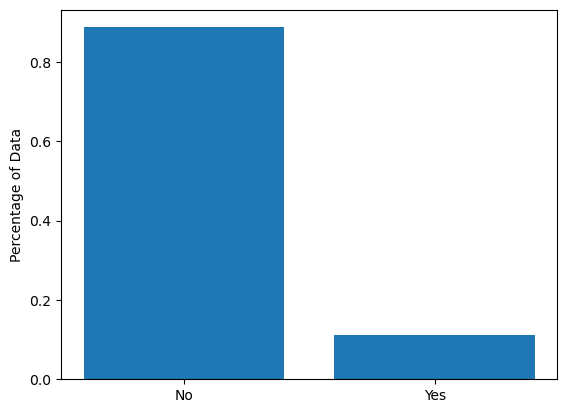

In [8]:
bar_plot(y)

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X.astype(int), y.astype(int), 
    test_size=0.3, 
    random_state=42
)

<div style="border: 1px solid black; border-radius: 5px; overflow: hidden;">
    <div style="background-color: black; color: white; padding: 5px; text-align: left;">
       1.) 
    </div>
    <div style="padding: 10px;">
        Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter.
</div>

In [10]:
smote = KMeansSMOTE(
    random_state=42
)

In [11]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

/home/m4wnn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


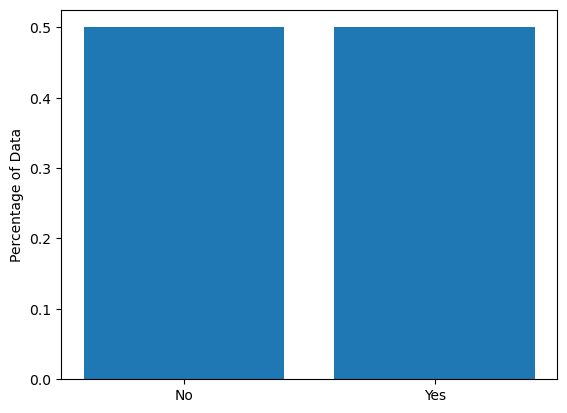

In [12]:
bar_plot(y_train_smote)

`KmeansSMOTE` is a method of oversampling that uses the KMeans algorithm to create synthetic data. It is a combination of `KMeans` and `SMOTE` algorithms. It was applied to the training data to balance the classes.

<div style="border: 1px solid black; border-radius: 5px; overflow: hidden;">
    <div style="background-color: black; color: white; padding: 5px; text-align: left;">
       2.) 
    </div>
    <div style="padding: 10px;">
        Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.
</div>

In [13]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 730.5\ngini = 0.5\nsamples = 51162\nvalue = [25580, 25582]\nclass = Yes'),
 Text(0.25, 0.625, 'duration <= 250.5\ngini = 0.162\nsamples = 27293\nvalue = [24867, 2426]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 0.5\ngini = 0.079\nsamples = 18866\nvalue = [18084, 782]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.071\nsamples = 18600\nvalue = [17919, 681]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.471\nsamples = 266\nvalue = [165, 101]\nclass = No'),
 Text(0.375, 0.375, 'contact_telephone <= 0.5\ngini = 0.314\nsamples = 8427\nvalue = [6783, 1644]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.384\nsamples = 5476\nvalue = [4057, 1419]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.141\nsamples = 2951\nvalue = [2726, 225]\nclass = No'),
 Text(0.75, 0.625, 'duration <= 1076.5\ngini = 0.058\nsamples = 23869\nvalue = [713, 23156]\nclass = Yes'),
 Text(0.625, 0.375, 'month_nov <= 0.5\ngini = 0.042\nsamples = 22836\nvalue = [487, 22349]\nclass = Yes'),
 Tex

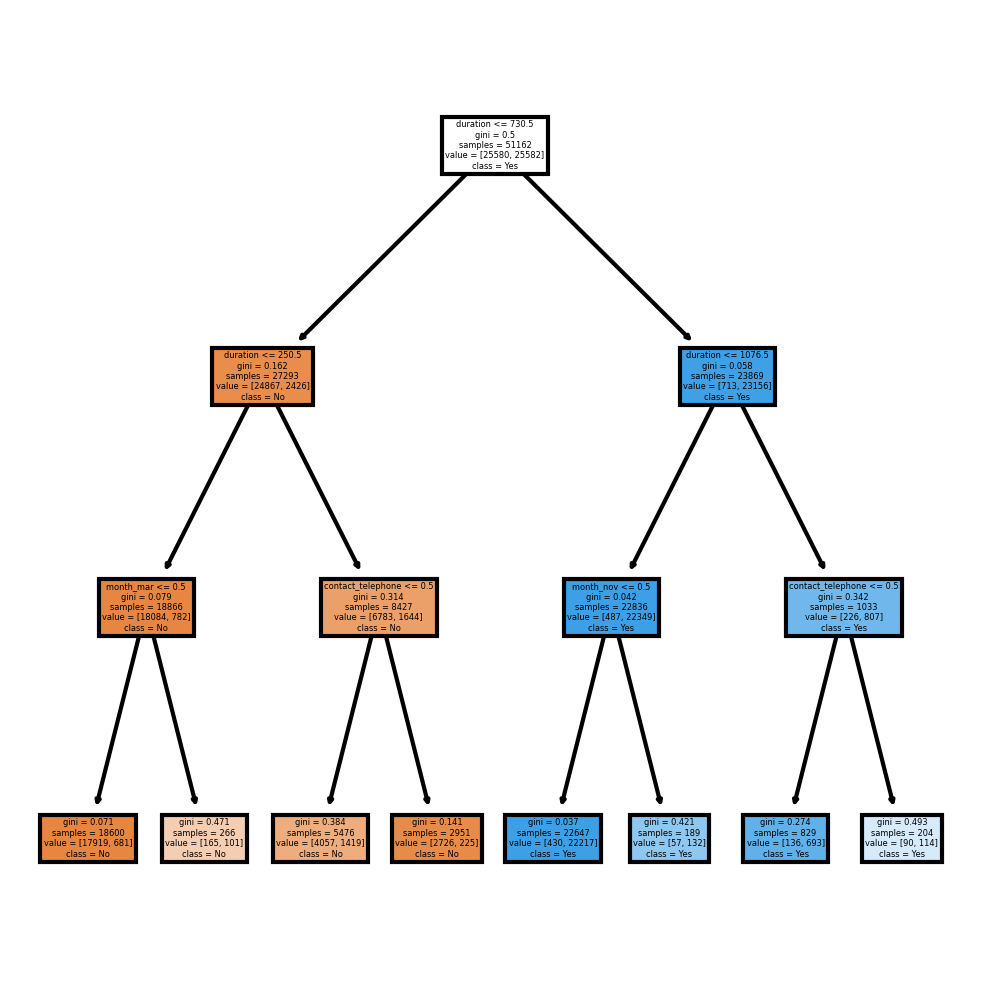

In [14]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(4,4),
    dpi=300
)

plot_tree(
    dtree,
    filled=True,
    feature_names=X_train_smote.columns,
    class_names=["No","Yes"]
)

<div style="border: 1px solid black; border-radius: 5px; overflow: hidden;">
    <div style="background-color: black; color: white; padding: 5px; text-align: left;">
       1b.) 
    </div>
    <div style="padding: 10px;">
        Confusion matrix on out of sample data. Visualize and store as variable

</div>

In [15]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

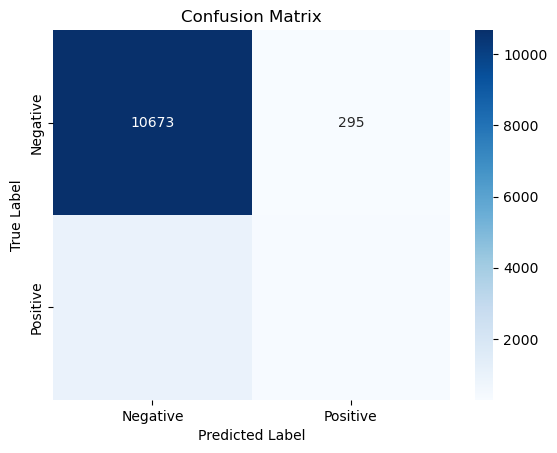

In [16]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(
    cm_raw, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=class_labels, 
    yticklabels=class_labels
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<div style="border: 1px solid black; border-radius: 5px; overflow: hidden;">
    <div style="background-color: black; color: white; padding: 5px; text-align: left;">
       3.) 
    </div>
    <div style="padding: 10px;">
       Use bagging on your decision tree
</div>

In [17]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    bootstrap_features=True,
    n_estimators=100,
    n_jobs=-1,
    random_state=42
)
bag.fit(X_train_smote, y_train_smote)

/home/m4wnn/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/m4wnn/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  bootstrap_features=True, n_estimators=100, n_jobs=-1,
                  random_state=42)

In [18]:
confusion_matrix(y_test, bag.predict(X_test))

array([[10683,   285],
       [ 1031,   358]])

<div style="border: 1px solid black; border-radius: 5px; overflow: hidden;">
    <div style="background-color: black; color: white; padding: 5px; text-align: left;">
       4.) 
    </div>
    <div style="padding: 10px;">
       Boost your tree.
</div>

In [19]:
boost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=100,
    random_state=42
)
boost.fit(X_train_smote, y_train_smote)

/home/m4wnn/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/m4wnn/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100, random_state=42)

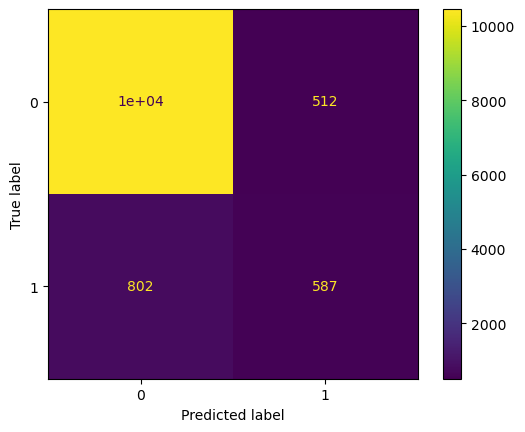

In [20]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, boost.predict(X_test))
).plot()

<div style="border: 1px solid black; border-radius: 5px; overflow: hidden;">
    <div style="background-color: black; color: white; padding: 5px; text-align: left;">
       5.) 
    </div>
    <div style="padding: 10px;">
       Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.
</div>

In [21]:
super = LogisticRegression()

In [22]:
def X_calc_super(X):
    return np.array(
        [
            bag.predict_proba(X)[:,1],
            boost.predict_proba(X)[:,1],
            dtree.predict_proba(X)[:,1]
        ]
    ).T

In [23]:
X_super = X_calc_super(X_train_smote)

In [24]:
super.fit(X_super, y_train_smote)

/home/m4wnn/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

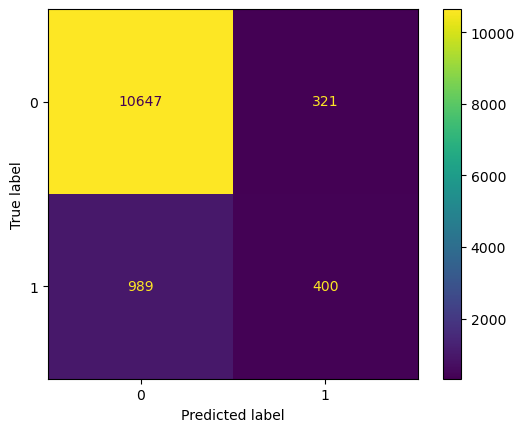

In [25]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, super.predict(X_calc_super(X_test)))
).plot()

In [26]:
temp = f"""
Coefficients:
- Bagging : {np.round(super.coef_[0][0], 2)}
- Boosting : {np.round(super.coef_[0][1], 2)}
- D. Tree: {np.round(super.coef_[0][2], 2)}
"""

print(temp)


Coefficients:
- Bagging : 12.29
- Boosting : 23.86
- D. Tree: -2.55



In this simple exercise the best performance was achieved with the `AdaBoost` model. The `LogisticRegression` model was used as a meta learner to combine the predictions of the `bagging`, `boosting`, and `dtree` models. The coefficients of the `DecisionTree` model is negative, which means that it is the least important in the ensemble. The `Boosting` model has the highest coefficient, which means it is the most important in the ensemble.